### IMPORTING LIBRARIES

In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

### DETECTING FACE AND EYES

In [2]:
img = cv2.imread('./power/RaviKumarDahiya/1ed07e54-f7c2-11eb-a9e6-75f3f3eb911d_1628411168313.jpg')
img.shape

(900, 1600, 3)

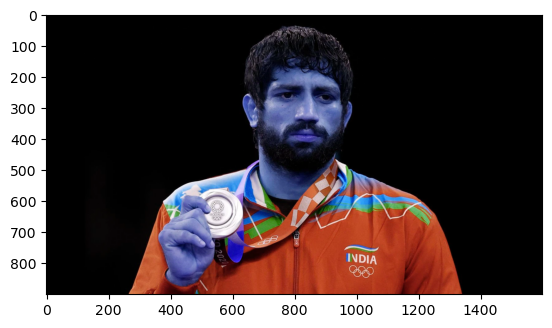

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(900, 1600)

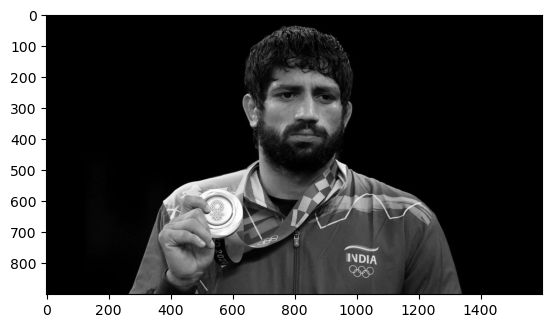

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./har/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./har/haarcascade_eye.xml')


faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[673, 134, 329, 329]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(673, 134, 329, 329)

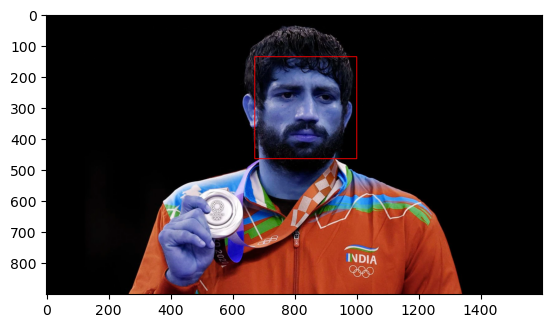

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

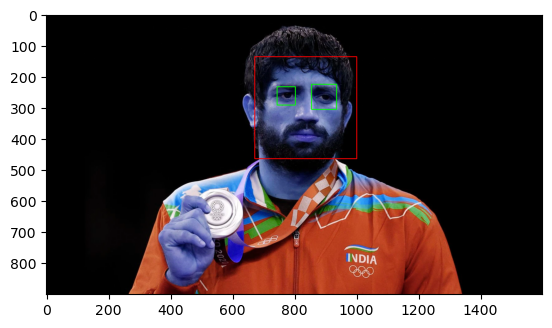

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

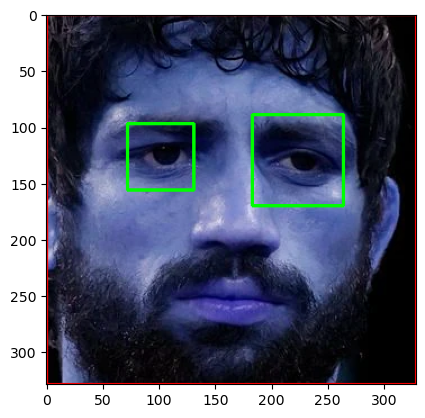

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

### CROPPING FACES WITH TWO CLEAR VISIBLE EYES

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) == 2:
            return roi_color

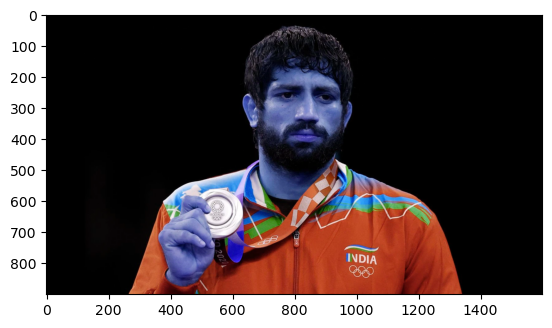

In [12]:
original_image = cv2.imread('./power/RaviKumarDahiya/1ed07e54-f7c2-11eb-a9e6-75f3f3eb911d_1628411168313.jpg')
plt.imshow(original_image)

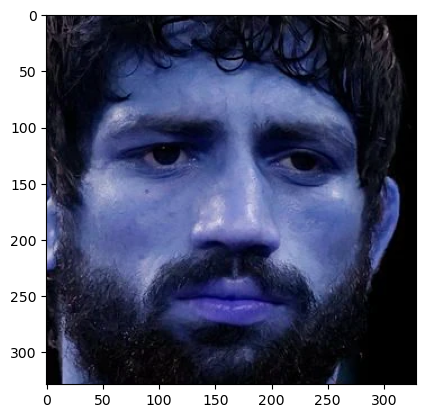

In [13]:
cropped_image = get_cropped_image_if_2_eyes('./power/RaviKumarDahiya/1ed07e54-f7c2-11eb-a9e6-75f3f3eb911d_1628411168313.jpg')
plt.imshow(cropped_image)

### MAKING SEPARATE FOLDER FOR CROPPED FACE

In [14]:
cropped_img = np.array(cropped_image)
cropped_img.shape

(329, 329, 3)

In [15]:
import pywt

def w2d(img, mode='haar', level=1):
    
    imArray = img
    imArray = cv2.cvtColor( imArray , cv2.COLOR_RGB2GRAY )
 
    imArray =  np.float32(imArray)   
    imArray /= 255;

    #compute coefficients   
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients    
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;      

    #reconstruction    
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    
    return imArray_H


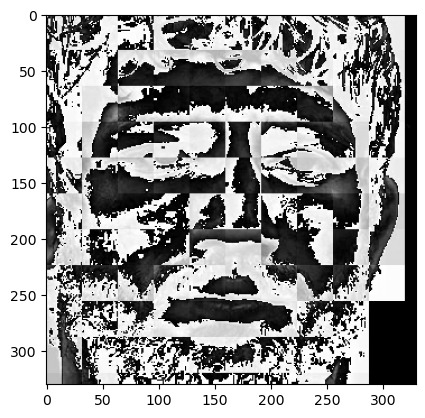

In [16]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [17]:
path_to_data = "./power/"
path_to_cr_data = "./power/cropped/"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./power/BajrangPunia',
 './power/LovlinaBorgohain',
 './power/NeerajChopra',
 './power/PVSindhu',
 './power/RaviKumarDahiya']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
human_names_dict = {}

for img_dir in img_dirs:
    count = 1
    human_name = img_dir.split('/')[-1]
    print(human_name)
    
    human_names_dict[human_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + human_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = human_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            human_names_dict[human_name].append(cropped_file_path)
            count += 1    

BajrangPunia
Generating cropped images in folder:  ./power/cropped/BajrangPunia
LovlinaBorgohain
Generating cropped images in folder:  ./power/cropped/LovlinaBorgohain
NeerajChopra
Generating cropped images in folder:  ./power/cropped/NeerajChopra
PVSindhu
Generating cropped images in folder:  ./power/cropped/PVSindhu
RaviKumarDahiya
Generating cropped images in folder:  ./power/cropped/RaviKumarDahiya


### MANUALLY DELETING UNWATED IMAGES

In [43]:
human_names_dict = {}
for img_dir in cropped_image_dirs:
    human_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    human_names_dict[human_name] = file_list
human_names_dict

{'BajrangPunia': ['./power/cropped/BajrangPunia\\BajrangPunia1.png',
  './power/cropped/BajrangPunia\\BajrangPunia10.png',
  './power/cropped/BajrangPunia\\BajrangPunia11.png',
  './power/cropped/BajrangPunia\\BajrangPunia12.png',
  './power/cropped/BajrangPunia\\BajrangPunia13.png',
  './power/cropped/BajrangPunia\\BajrangPunia14.png',
  './power/cropped/BajrangPunia\\BajrangPunia15.png',
  './power/cropped/BajrangPunia\\BajrangPunia16.png',
  './power/cropped/BajrangPunia\\BajrangPunia17.png',
  './power/cropped/BajrangPunia\\BajrangPunia19.png',
  './power/cropped/BajrangPunia\\BajrangPunia20.png',
  './power/cropped/BajrangPunia\\BajrangPunia21.png',
  './power/cropped/BajrangPunia\\BajrangPunia22.png',
  './power/cropped/BajrangPunia\\BajrangPunia23.png',
  './power/cropped/BajrangPunia\\BajrangPunia24.png',
  './power/cropped/BajrangPunia\\BajrangPunia26.png',
  './power/cropped/BajrangPunia\\BajrangPunia27.png',
  './power/cropped/BajrangPunia\\BajrangPunia28.png',
  './power/cr

In [26]:
class_dict = {}
count = 0
for human_name in human_names_dict.keys():
    class_dict[human_name] = count
    count = count + 1
class_dict

{'BajrangPunia': 0,
 'LovlinaBorgohain': 1,
 'NeerajChopra': 2,
 'PVSindhu': 3,
 'RaviKumarDahiya': 4}

### TRAINING OUR MODEL

In [27]:
X, y = [], []
for human_name, training_files in human_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[human_name])     

In [28]:
len(X)

150

In [29]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(150, 4096)

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)


In [31]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7894736842105263

In [32]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### USING GRID SEARCH CV TO FIND THE BEST ALGORITHM

In [33]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [34]:
scores = []
best_estimators = {}

import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.643874,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.552569,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.660870,{'logisticregression__C': 1}


In [35]:
best_estimators['svm'].score(X_test,y_test)

0.8421052631578947

In [36]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8157894736842105

In [40]:
best_estimators['random_forest'].score(X_test,y_test)

0.6842105263157895

In [37]:
from sklearn.metrics import confusion_matrix

best_clf = best_estimators['svm']
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[8, 0, 0, 1, 1],
       [0, 4, 1, 1, 0],
       [0, 0, 7, 0, 0],
       [0, 0, 0, 6, 0],
       [2, 0, 0, 0, 7]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

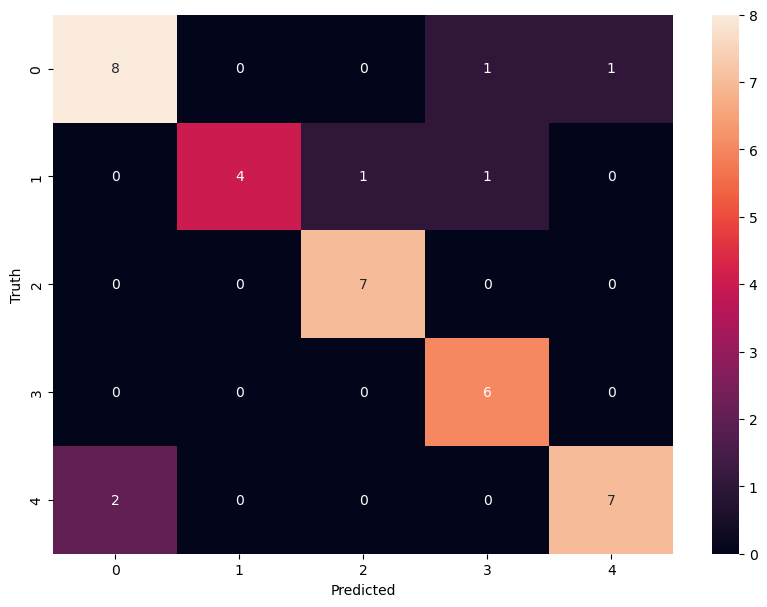

In [38]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
class_dict

{'BajrangPunia': 0,
 'LovlinaBorgohain': 1,
 'NeerajChopra': 2,
 'PVSindhu': 3,
 'RaviKumarDahiya': 4}

In [41]:
best_estimators['svm'].predict(X_test)

array([4, 0, 3, 0, 0, 4, 0, 3, 4, 1, 1, 2, 3, 0, 2, 2, 1, 3, 0, 3, 2, 2,
       0, 3, 2, 0, 0, 4, 1, 4, 4, 3, 2, 4, 2, 0, 4, 3])

In [42]:
y_test

[0,
 0,
 3,
 0,
 0,
 4,
 0,
 3,
 4,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 3,
 4,
 3,
 2,
 2,
 4,
 3,
 2,
 0,
 0,
 4,
 1,
 4,
 4,
 0,
 2,
 4,
 2,
 0,
 4,
 3]

### SAVING THE TRAINED MODEL AND CLASS DICTIONARY

In [44]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [45]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))